In [1]:
import pandas as pd
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [2]:
nlines=10
pastel=cmap=plt.get_cmap('Pastel1')
pastel_colors = cmap(np.linspace(0,1,nlines))
set2=cmap=plt.get_cmap('Set2')
set2_colors = cmap(np.linspace(0,1,nlines))

In [3]:
data=pd.read_csv("rotuman-data.csv",names=["Name", "Sex", "Birth date", "Mother's Name", 
                                           "Father's Name", "Deathdate","Cause of Death",
                                           "Age at Death","Birth Order","Mother's age at birth", 
                                           "Father's age at birth","Parents married","Ethnicity"])
                 #,parse_dates=['Deathdate'])
data=data.drop([0, 0])

In [7]:
data['Rotuman']=pd.Series(np.zeros(len(data)), index=data.index)
data['Pac Is']=pd.Series(np.zeros(len(data)), index=data.index)
data['Non Pac Is']=pd.Series(np.zeros(len(data)), index=data.index)

In [9]:
ethnicity=pd.Series(data['Ethnicity'])
ethnicity_rot=ethnicity[ethnicity.str.contains('Rot')==True]
ethnicity_pac=ethnicity[ethnicity.str.contains('Pac')==True]
ethnicity_euro=ethnicity[ethnicity.str.contains('Eur')==True]
ethnicity_asian=ethnicity[ethnicity.str.contains('Asian')==True]

In [10]:
for i in range(len(data)):
    if 'Rot' in ethnicity.values[i]:
        data['Rotuman'].values[i]=1
    if 'Pac' in ethnicity.values[i]:
        data['Pac Is'].values[i]=1
    if 'Eur' in ethnicity.values[i]:
        data['Non Pac Is'].values[i]=1
    if 'Asian' in ethnicity.values[i]:
        data['Non Pac Is'].values[i]=1

In [20]:
len(data[data['Cause of Death']==""])

0

In [65]:
data

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity
1,Injimo Hae,m,7/15/1932,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,1,20,27,7/15/1932,Rotuman/Rotuman
2,Henri Alferete Sakimi,m,3/15/1934,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,2,22,22,7/15/1932,Rotuman/Rotuman
3,Seferosa Sakimi,f,12/15/1935,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,3,24,30,7/15/1932,Rotuman/Rotuman
4,Maria Mekatoa,f,11/15/1937,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,4,25,32,7/15/1932,Rotuman/Rotuman
5,Amai Suliana,m,6/15/1939,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,5,27,34,7/15/1932,Rotuman/Rotuman
6,Garsau Jare,m,11/15/1941,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,6,29,36,7/15/1932,Rotuman/Rotuman
7,Alferete Petero,m,12/15/1943,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,7,32,38,7/15/1932,Rotuman/Rotuman
8,Akansisi Vataiiki,f,12/15/1945,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,8,34,40,7/15/1932,Rotuman/Rotuman
9,Terotuma Sisirie,f,2/15/1950,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,9,38,45,7/15/1932,Rotuman/Rotuman
10,Makarita Vika,f,7/15/1952,fatiaki kijiana,sakimi kautane,15/12/1956,pneumonia,4,10,40,47,7/15/1932,Rotuman/Rotuman


In [11]:
#data[data['Deathdate']<""]

In [4]:
cause=pd.Series(data['Cause of Death'])

In [12]:
#data[cause.str.contains('measles')==True]

In [5]:
measles_cases=cause[cause.str.contains('measles')==True]

In [117]:
pd.unique(measles_cases)

array(['measles', 'measles, diarrhoea', 'tuberculosis, measles',
       'measles, pneumonia', 'measles, diahrroea', 'measles, debility',
       'measles, ileo-colitis', 'measles, phthisis', 'phthisis, measles',
       'measles, cardiac failure', 'measles, diarrhoea,\x0bheart failure',
       'measles, tuberculosis', 'measles, convulsions',
       'measles, yaws, \x0bsore throat', 'measles, gastritis',
       'measles, diarrhoea,\x0bpregnancy', 'measles, diarrhoea, phthisis',
       'measles, diarrhoea, ostitis', 'measles, miscarriage',
       'measles, phthisis, diarrhoea', 'measles, diarrhoea,\x0bchildbirth',
       'measles, diarrhoea,\x0bmiscarriage'], dtype=object)

In [6]:
measles=data[cause.str.contains('measles')==True]

In [6]:
measles_age=measles['Age at Death'].values
measles_date=measles['Deathdate'].values

In [12]:
date_dist=measles_date.as_matrix()

In [7]:
age_dist=measles_age.as_matrix()

In [8]:
for i in range(len(age_dist)):
    age_dist[i]=float(age_dist[i])

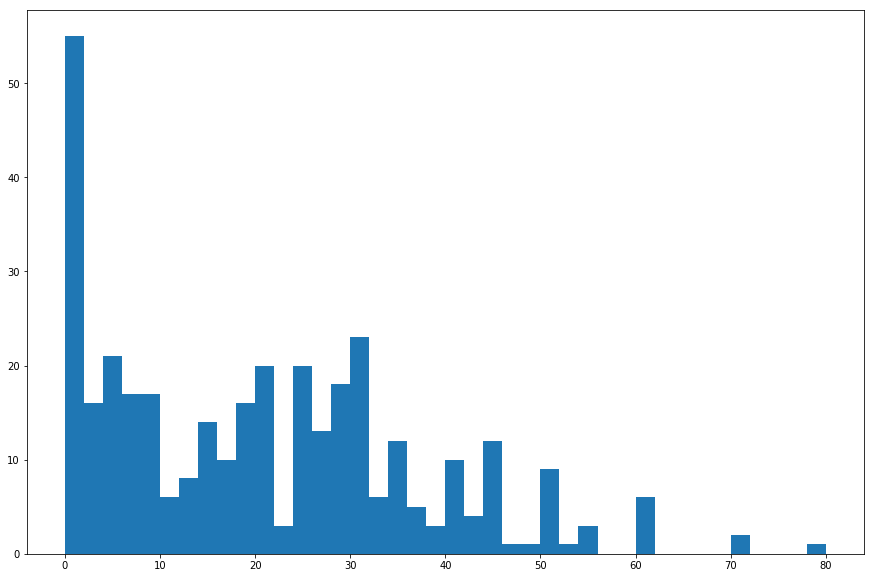

In [9]:
plt.figure(figsize=(15,10))
plt.hist(age_dist,bins=40)
plt.show()

In [10]:
deathdate=data['Deathdate']

In [70]:
measles1911_age=measles1911['Age at Death'].values
age_dist=measles1911_age
for i in range(len(measles1911)):
    age_dist[i]=float(measles1911_age[i])

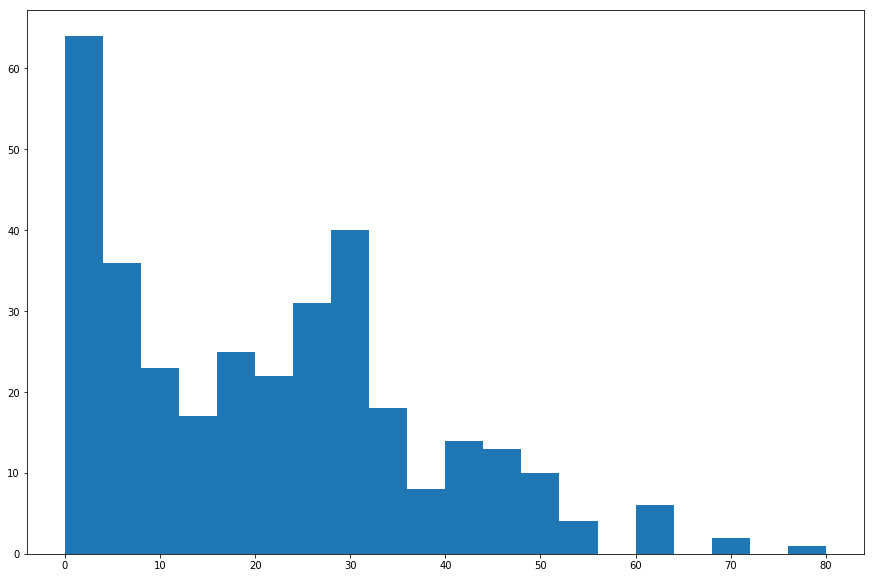

In [73]:
plt.figure(figsize=(15,10))
plt.hist(age_dist,bins=20)
plt.show()

In [78]:
birthdates[0][6:]

'1932'

In [80]:
alive1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
57,Mere Rejieli,f,15/07/1911,kijiana faga,faktaufon akerio,31/12/1960,NaN,alive,2,29,35,11/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
80,Taukave Etike Jione,m,15/05/1905,sofia,aisake varea,31/12/1960,NaN,?,1,21,30,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
82,Memaofa Rusile,f,15/12/1908,sofia,aisake varea,31/12/1960,NaN,alive,3,25,35,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
156,Litu,f,15/03/1909,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,1,25,31,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
157,George Nakaora,m,15/11/1910,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,2,26,33,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
162,Suakmasa Rusila,f,15/02/1905,semantafa,auuri taito kautaurafi,15/12/1927,tubercular gland,22,1,25,26,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
163,Aisake,m,15/04/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2,27,28,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
164,Kijiana,f,15/04/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3,30,31,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
194,Terotuma makereta,f,15/06/1911,rejieli uramafaga,alfereti tevita,15/06/1939,cancer of uterus,28,1,18,20,10/15/1910,Rotuman/Rotuman,1.0,0.0,0.0
218,Tanu Vasea Rave,m,15/05/1906,tamalesi,erasito toutou,31/12/1960,NaN,alive,2,31,27,NaN,Rotuman/Rotuman,1.0,0.0,0.0


In [94]:
alive1911_age=alive1911['Birth date'].values
age_dist=alive1911_age
for i in range(len(alive1911)):
    age_dist[i]=1911-float(alive1911_age[i][6:])

ValueError: could not convert string to float: '/1911'

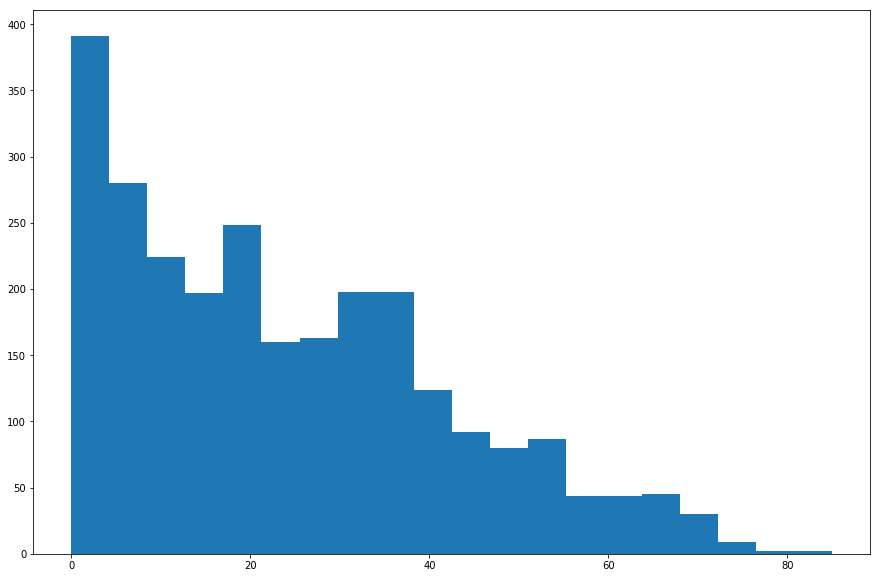

In [86]:
plt.figure(figsize=(15,10))
plt.hist(-1*age_dist,bins=20)
plt.show()

In [75]:
pd.unique(alive1911['Age at Death'])

array(['alive', '?', '22', '4', '1', '28', '1.2', '15', '8', '0.8', '1.8',
       '5', '38', '51', '62', '20', '0', '44', '46', '0.9', '2.1', '6',
       '17', '45', '50', '21', '34', '0.7', '4.7', '14', '12', '2.6', '18',
       '2', '3', '40', '2.5', '54', '39', '55', '1.1', '25', '0.3', '0.2',
       '0.6', '2.9', '6.5', '36', '13', '3.3', '29', '47', '32', '16',
       '0.1', '23', '2.2', '4.8', '6.8', '0.5', '9', '1.3', '27', '19',
       '1.4', '2.7', '31', '4.5', '37', '3.8', '1.7', '1.5', '52', '4.4',
       '53', '2.4', '2.8', '11', '43.9', '56', '42', '7', '49', '60', '85',
       '90', '80', '89', '103', '75', '86', '70', '69', '65', '73', '67',
       '76', '78', '68', '74', '66', '64', '95', '59', '58', '72', '63',
       '77', '84', '79', '48', '88', '83', '57', '43', '81', '61', '82',
       '71', '35', '33', '41', '30', '26', '24', '18.2575342466',
       '18.8438356164', '16.6', '10', '17.2575342466', '2.3', '0.4',
       'Unknown', nan], dtype=object)

In [83]:
#measles_date.values

In [65]:
len(measles)

353

In [77]:
pd.unique(data['Ethnicity'])

array(['Rotuman/Rotuman', 'Rot-Pac Is/Rotuman', 'Part-European/Rotuman',
       'Rotuman/Rot-Pac Is', 'Pac Is/Rotuman', 'Rotuman/Asian',
       'Rot-Euro/Rotuman', 'Rotuman-Pac Is/No Info',
       'Rotuman/Part-European', 'European/Rot-European', 'Asian/Rotuman',
       'Rotuman-Euro/European', 'Rot-Pac Is/Rot-Euro', 'Rotuman/Pac Is',
       'Pac Is/No Info', 'Rotuman/Rot-European', 'Rotuman/European',
       'Rot-Euro/Rot-Euro', 'Rotuman-Euro/Pac Is', 'Rot-Asian/Rot-Asian',
       'Rot-Euro/Part-European', 'Rot-Asian/Pac Is',
       'Rotuman/Rotuman-Asian', 'Part-Euro/European', 'Part-Euro/Rot-Euro',
       'Rotuman-Pac Is/Asian', 'Pac Is/Rotuman-Pac Is',
       'Rotuman-Euro/Asian', 'Rotuman-Euro/No Info', 'Rot-Euro/Rot-Pac Is',
       'Rot-Pac Is/Rot-Pac Is', 'Rotuman-Pac Is/Pac Is',
       'Rot-Asian/Rotuman', 'Rot-Asian/Rot-Pac Is', 'Rotuman-Pac Is/Euro',
       'Pac Is/Rotuman-European', 'Rot-Asian/Rot-Euro',
       'Rotuman-Asian/Asian', 'Part-Euro/Rotuman-Pac Is',
       'No In

In [73]:
measles_date.values[72]

'04/16/1903'

In [110]:
# measles_datetime = np.zeros(len(measles)).astype(datetime)
# for i in range(len(measles)):
#     print(i)
#     measles_datetime[i]=datetime.strptime(measles_date.values[i],'%d/%m/%Y')

In [59]:
measles_datetime1

datetime.datetime(1911, 4, 14, 0, 0)

In [48]:
measles_datetime.values[1]

numpy.datetime64('1911-04-14T00:00:00.000000000')

In [111]:
measles_yr=np.zeros(len(measles_date))
for i in range(len(measles_date)):
    measles_yr[i]=int(measles_date[i][6:10])

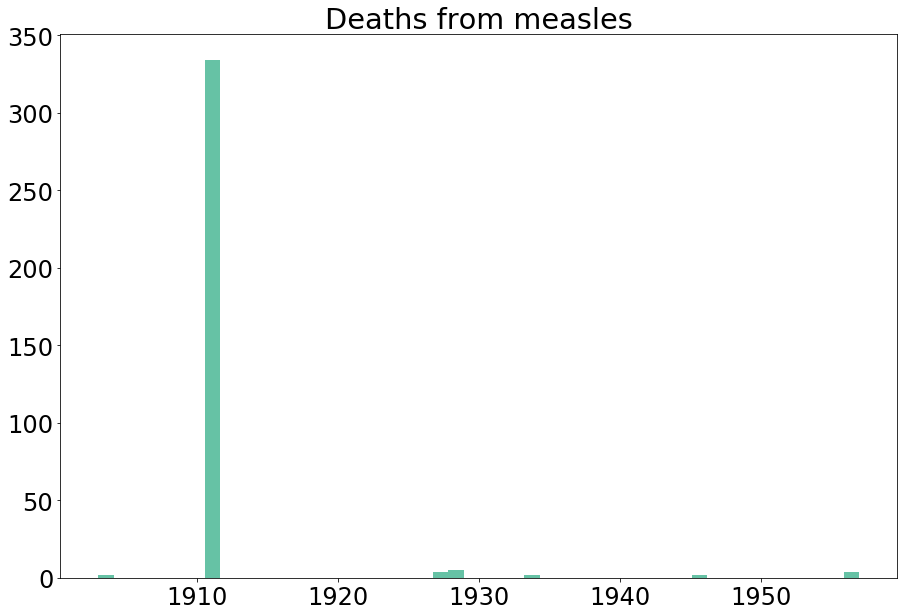

In [114]:
plt.figure(figsize=(15,10))
plt.hist(measles_yr,color=set2_colors[0],bins=50)
plt.title("Deaths from measles")
plt.show()

In [13]:
alive1911 = pd.DataFrame(columns=["Name", "Sex", "Birth date", "Mother's Name", 
                                           "Father's Name", "Deathdate","Cause of Death",
                                           "Age at Death","Birth Order","Mother's age at birth", 
                                           "Father's age at birth","Parents married","Ethnicity"
                                ,"Rotuman","Pac Is","Non Pac Is"])

In [134]:
alive1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is


In [64]:
import math

# Changing dates into dd/mm/yyyy format

In [13]:
birthdates=data['Birth date'].values
deathdates=data['Deathdate'].values

In [14]:
for i in range(len(data)):
    if type(birthdates[i])==str:
        if len(birthdates[i])<10:
            if birthdates[i][1]=='/':
                birthdates[i]='0'+birthdates[i]
            if birthdates[i][4]=='/':
                birthdates[i]=birthdates[i][:3]+'0'+birthdates[i][3:]

    if type(deathdates[i])==str and deathdates[i]!='alive':     
        if len(deathdates[i])<10:
            if deathdates[i][1]=='/':
                deathdates[i]='0'+deathdates[i]
            if deathdates[i][4]=='/':
                deathdates[i]=deathdates[i][:3]+'0'+deathdates[i][3:]
            

In [140]:
birthdates[643]

'1/1/1899'

In [17]:
for i in range(len(data)):
    if type(birthdates[i])==str:
        if birthdates[i][2]!='/':
            print(i)
            print(birthdates[i])
        if birthdates[i][5]!='/':
            print(i)
            print(birthdates[i])
    if type(deathdates[i])==str and deathdates[i]!='alive':  
        if deathdates[i][2]!='/':
            print(i)
            print(deathdates[i])
        if deathdates[i][5]!='/':
            print(i)
            print(deathdates[i])
# birthdates[1188]=birthdates[1188][:3]+birthdates[1188][4:]
# deathdates[9619]='0'+deathdates[9619][:2]+deathdates[9619][3:]
# deathdates[9816]=deathdates[9816][1:2]+'0'+deathdates[9816][3:]

In [16]:
birthdates[1188]=birthdates[1188][:3]+birthdates[1188][4:]
deathdates[9619]='0'+deathdates[9619][:2]+deathdates[9619][3:]
deathdates[9816]=deathdates[9816][1:3]+'/0' +deathdates[9816][4:]

In [216]:
# birthdates[1188]=birthdates[1188][:3]+birthdates[1188][4:]
# deathdates[9619]='0'+deathdates[9619][:2]+deathdates[9619][3:]
# deathdates[9816]=deathdates[9816][:3]+'0'+deathdates[9816][3:]

In [18]:
for i in range(len(data)):
    if type(birthdates[i])==str:
        if len(birthdates[i])<10:
            print(i)
    if type(deathdates[i])==str:     
        if len(deathdates[i])<10 and deathdates[i]!='alive':  
            print(i)

In [23]:
for i in range(len(data)):
    if type(birthdates[i])==str :
        if int(birthdates[i][3:5])>12:
            birthdates[i]=birthdates[i][3:6]+birthdates[i][0:3]+birthdates[i][6:]
    if type(deathdates[i])==str and deathdates[i]!='alive':
        print(i)
        if int(deathdates[i][3:5])>12:
            deathdates[i]=deathdates[i][3:6]+deathdates[i][0:3]+deathdates[i][6:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
107
108
109
110
111
112
113
114
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
173
174
175
176
177
178
179
180
181
182
183
184
185
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
212
213
214
215
216
217
219
220
221
222
224
225
226
227
229
230
231
233
235
236
238
239
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
2

2749
2750
2751
2752
2753
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2809
2810
2811
2813
2814
2815
2816
2817
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2912
2913
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960


5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5772
5775
5776
5777
5778
5779
5780
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5795
5796
5798
5799
5801
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5816
5818
5819
5821
5822
5823
5824
5825
5826
5827
5828
5830
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5896
5897
5898
5899
5900
5901
5903
5904
5905
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5922
5923
5924
5925
5926
5930
5932
5933
5934
5935
5936
5937
5938
5939


9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406


In [25]:
data['Birth date']=birthdates

In [26]:
data['Deathdate']=deathdates

In [24]:
alive1911 = pd.DataFrame(columns=["Name", "Sex", "Birth date", "Mother's Name", 
                                           "Father's Name", "Deathdate","Cause of Death",
                                           "Age at Death","Birth Order","Mother's age at birth", 
                                           "Father's age at birth","Parents married","Ethnicity"
                                ,"Rotuman","Pac Is","Non Pac Is"])

for i in range(len(data)):
    if type(birthdates[i])==str and type(deathdates[i])==str:
        if datetime.strptime(birthdates[i],'%d/%m/%Y') < datetime(1912, 1, 1, 0, 0):
            if datetime.strptime(deathdates[i],'%d/%m/%Y') > datetime(1911, 1, 1, 0, 0) or deathdates[i]=='alive':
                alive1911=alive1911.append(data.iloc[i])
        

In [30]:
alive1911.to_csv('alivein1911.csv')

In [42]:
alive1911[alive1911["Sex"]=='n']

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
10198,Jioje Malau,n,01/01/1884,NaN,NaN,31/12/1960,NaN,alive,NaN,NaN,NaN,NaN,Pac Is/Pac Is,0.0,1.0,0.0


In [34]:
alive1911[alive1911["Sex"]=='m ']

array(['f', 'm', 'm ', 'M', nan, '?', 'n'], dtype=object)

In [28]:
alive1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
57,Mere Rejieli,f,15/07/1911,kijiana faga,faktaufon akerio,31/12/1960,NaN,alive,2,29,35,11/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
80,Taukave Etike Jione,m,15/05/1905,sofia,aisake varea,31/12/1960,NaN,?,1,21,30,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
82,Memaofa Rusile,f,15/12/1908,sofia,aisake varea,31/12/1960,NaN,alive,3,25,35,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
156,Litu,f,15/03/1909,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,1,25,31,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
157,George Nakaora,m,15/11/1910,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,2,26,33,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
162,Suakmasa Rusila,f,15/02/1905,semantafa,auuri taito kautaurafi,15/12/1927,tubercular gland,22,1,25,26,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
163,Aisake,m,15/04/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2,27,28,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
164,Kijiana,f,15/04/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3,30,31,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
194,Terotuma makereta,f,15/06/1911,rejieli uramafaga,alfereti tevita,15/06/1939,cancer of uterus,28,1,18,20,10/15/1910,Rotuman/Rotuman,1.0,0.0,0.0
218,Tanu Vasea Rave,m,15/05/1906,tamalesi,erasito toutou,31/12/1960,NaN,alive,2,31,27,NaN,Rotuman/Rotuman,1.0,0.0,0.0


In [179]:
alive1911[alive1911['Deathdate']=='alive']

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is


In [226]:
measles_date[0][6:]

'1934'

In [228]:
data.iloc[0]

Name                          Injimo Hae
Sex                                    m
Birth date                    15/07/1932
Mother's Name            fatiaki kijiana
Father's Name             sakimi kautane
Deathdate                     31/12/1960
Cause of Death                       NaN
Age at Death                       alive
Birth Order                            1
Mother's age at birth                 20
Father's age at birth                 27
Parents married                7/15/1932
Ethnicity                Rotuman/Rotuman
Rotuman                                1
Pac Is                                 0
Non Pac Is                             0
Name: 1, dtype: object

In [227]:
measles.iloc[0]

Name                      Saverio Fauoro
Sex                                    m
Birth date                    15/04/1933
Mother's Name             sarote rosarie
Father's Name            kopure tanselao
Deathdate                     15/06/1934
Cause of Death                   measles
Age at Death                         1.2
Birth Order                            6
Mother's age at birth                 27
Father's age at birth                 26
Parents married                2/15/1924
Ethnicity                Rotuman/Rotuman
Rotuman                                1
Pac Is                                 0
Non Pac Is                             0
Name: 94, dtype: object

In [80]:
measles1911=pd.DataFrame(columns=["Name", "Sex", "Birth date", "Mother's Name", 
                                           "Father's Name", "Deathdate","Cause of Death",
                                           "Age at Death","Birth Order","Mother's age at birth", 
                                           "Father's age at birth","Parents married","Ethnicity"
                                ,"Rotuman","Pac Is","Non Pac Is"])

for i in range(len(measles)):
    if measles_date[i][6:]=='1911':
        measles1911=measles1911.append(measles.iloc[i])
    

In [181]:
len(alive1911[alive1911['Rotuman']==1])

2517

In [209]:
len(alive1911[alive1911['Ethnicity']=='Rotuman/Rotuman'])

2351

In [200]:
len(alive1911[alive1911['Non Pac Is']==1])

96

In [205]:
len(alive1911[alive1911['Pac Is']==1])

165

In [182]:
len(alive1911)

2618

In [235]:
len(measles1911)

334

In [231]:
len(measles1911[measles1911['Ethnicity']=='Rotuman/Rotuman'])

324

In [232]:
len(measles1911[measles1911['Rotuman']==1])

333

In [233]:
len(measles1911[measles1911['Pac Is']==1])

5

In [236]:
len(measles1911[measles1911['Non Pac Is']==1])

5

In [191]:
measles[measles['Rotuman']==0]

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
9691,Ini,f,01/01/1857,Gilbertese,Gilbertese,01/05/1911,"measles, diarrhoea",54,NaN,NaN,NaN,NaN,Pac Is/Pac Is,0.0,1.0,0.0


In [189]:
len(measles)

353

In [64]:
for i in range(len(measles)):
    if int(measles_date.values[i][3:5])>12:
        if datetime.strptime(measles_date.values[i],'%m/%d/%Y') < datetime(1912, 1, 1, 0, 0):
            
    if datetime.strptime(measles_date.values[i],'%d/%m/%Y') < datetime(1912, 1, 1, 0, 0):
        

true


In [83]:
datetime.date(measles_date)

TypeError: descriptor 'date' requires a 'datetime.datetime' object but received a 'Series'

In [88]:
data[data['Ethnicity']=="Rotuman/Rotuman"]

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity
1,Injimo Hae,m,7/15/1932,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,1,20,27,7/15/1932,Rotuman/Rotuman
2,Henri Alferete Sakimi,m,3/15/1934,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,2,22,22,7/15/1932,Rotuman/Rotuman
3,Seferosa Sakimi,f,12/15/1935,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,3,24,30,7/15/1932,Rotuman/Rotuman
4,Maria Mekatoa,f,11/15/1937,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,4,25,32,7/15/1932,Rotuman/Rotuman
5,Amai Suliana,m,6/15/1939,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,5,27,34,7/15/1932,Rotuman/Rotuman
6,Garsau Jare,m,11/15/1941,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,6,29,36,7/15/1932,Rotuman/Rotuman
7,Alferete Petero,m,12/15/1943,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,7,32,38,7/15/1932,Rotuman/Rotuman
8,Akansisi Vataiiki,f,12/15/1945,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,8,34,40,7/15/1932,Rotuman/Rotuman
9,Terotuma Sisirie,f,2/15/1950,fatiaki kijiana,sakimi kautane,31/12/1960,NaN,alive,9,38,45,7/15/1932,Rotuman/Rotuman
10,Makarita Vika,f,7/15/1952,fatiaki kijiana,sakimi kautane,15/12/1956,pneumonia,4,10,40,47,7/15/1932,Rotuman/Rotuman


In [92]:
len(measles[measles['Ethnicity']=="Rotuman/Rotuman"])/len(measles)

0.9660056657223796

In [47]:
pr=2351/2618

In [49]:
mr=324

In [50]:
nm=334

In [59]:
((mr-pr*nm)**2)/(pr*nm)+((nm-mr-(1-pr)*nm)**2)/((1-pr)*nm)

18.929675401322918

In [55]:
(1-pr)*nm

34.063407181054245

In [56]:
pr*nm

299.93659281894577

In [57]:
(324-299)*(324-299)/299

2.0903010033444818

In [58]:
nm-pr

333.10198624904507

In [196]:
type(alive1911['Birth date'].values)

numpy.ndarray

In [60]:
from scipy.stats import chisquare

In [62]:
chisquare([mr,nm-mr], f_exp=[pr*nm,(1-pr)*nm])


Power_divergenceResult(statistic=18.929675401322918, pvalue=1.3562646436039216e-05)

In [197]:
alive1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
57,Mere Rejieli,f,0,kijiana faga,faktaufon akerio,31/12/1960,NaN,alive,2,29,35,11/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
80,Taukave Etike Jione,m,6,sofia,aisake varea,31/12/1960,NaN,?,1,21,30,7/15/1908,Pac Is/Rotuman,NaN,NaN,NaN
82,Memaofa Rusile,f,3,sofia,aisake varea,31/12/1960,NaN,alive,3,25,35,7/15/1908,Pac Is/Rotuman,NaN,NaN,NaN
156,Litu,f,2,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,1,25,31,3/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
157,George Nakaora,m,1,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,2,26,33,3/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
162,Suakmasa Rusila,f,6,semantafa,auuri taito kautaurafi,15/12/1927,tubercular gland,22,1,25,26,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
163,Aisake,m,4,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2,27,28,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
164,Kijiana,f,1,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3,30,31,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
194,Terotuma makereta,f,0,rejieli uramafaga,alfereti tevita,15/06/1939,cancer of uterus,28,1,18,20,10/15/1910,Rotuman/Rotuman,NaN,NaN,NaN
218,Tanu Vasea Rave,m,5,tamalesi,erasito toutou,31/12/1960,NaN,alive,2,31,27,NaN,Rotuman/Rotuman,NaN,NaN,NaN


In [44]:
alive1911_age=alive1911['Birth date'].values
age_dist=np.zeros(len(alive1911_age))
for i in range(len(alive1911)):
    age_dist[i]=1911-float(alive1911_age[i][6:])
    

In [206]:
alive1911['Birth date'].values[3]

2.0

In [207]:
alive1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
57,Mere Rejieli,f,0,kijiana faga,faktaufon akerio,31/12/1960,NaN,alive,2,29,35,11/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
80,Taukave Etike Jione,m,6,sofia,aisake varea,31/12/1960,NaN,?,1,21,30,7/15/1908,Pac Is/Rotuman,NaN,NaN,NaN
82,Memaofa Rusile,f,3,sofia,aisake varea,31/12/1960,NaN,alive,3,25,35,7/15/1908,Pac Is/Rotuman,NaN,NaN,NaN
156,Litu,f,2,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,1,25,31,3/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
157,George Nakaora,m,1,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,2,26,33,3/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
162,Suakmasa Rusila,f,6,semantafa,auuri taito kautaurafi,15/12/1927,tubercular gland,22,1,25,26,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
163,Aisake,m,4,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2,27,28,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
164,Kijiana,f,1,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3,30,31,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
194,Terotuma makereta,f,0,rejieli uramafaga,alfereti tevita,15/06/1939,cancer of uterus,28,1,18,20,10/15/1910,Rotuman/Rotuman,NaN,NaN,NaN
218,Tanu Vasea Rave,m,5,tamalesi,erasito toutou,31/12/1960,NaN,alive,2,31,27,NaN,Rotuman/Rotuman,NaN,NaN,NaN


In [45]:
age_dist_rot=np.array([])
age_dist_pacis=np.array([])
age_dist_nonpacis=np.array([])
age_dist_other=np.array([])


for i in range(len(alive1911)):
    
    if alive1911['Pac Is'].values[i]==1:
        #print(i)
        age_dist_pacis=np.append(age_dist_pacis,(1911-float(alive1911_age[i][6:])))
        #print(age_dist_pacis)
    elif alive1911['Non Pac Is'].values[i]==1:
        age_dist_nonpacis=np.append(age_dist_nonpacis,(1911-float(alive1911_age[i][6:])))
    elif alive1911['Rotuman'].values[i]==1 and alive1911['Pac Is'].values[i]==0 and alive1911['Non Pac Is'].values[i]==0:
        age_dist_rot=np.append(age_dist_rot,(1911-float(alive1911_age[i][6:])))
    else:
        age_dist_other=np.append(age_dist_other,(1911-float(alive1911_age[i][6:])))
    

In [51]:
len(age_dist_nonpacis)

94

In [46]:
len(age_dist_rot)

2351

In [57]:
len(age_dist_rot[age_dist_rot<6])

402

In [61]:
len(age_dist_other[age_dist_other<6])

1

In [53]:
len(alive1911_age[alive1911_age<5])

TypeError: '<' not supported between instances of 'str' and 'int'

In [47]:
len(age_dist_pacis)

165

In [52]:
pd.unique(alive1911["Ethnicity"])

array(['Rotuman/Rotuman', 'Pac Is/Rotuman', 'Rotuman/European',
       'Rotuman/Rot-European', 'Rot-Euro/Rot-Euro', 'Rotuman/Rot-Pac Is',
       'Rot-Pac Is/Rotuman', 'Rot-Euro/Rotuman', 'Rotuman-Pac Is/Pac Is',
       'Rotuman/Pac Is', 'Rot-Asian/Rot-Euro', 'Pac Is/Rotuman-Pac Is',
       'Pac Is/Pac Is', 'European/European', 'Other/Other',
       'No Info/Pac Is', 'Rotuman-Pac Is/Rotuman', 'Rotuman-Euro/European',
       'Pac Is/No Info', 'Part-Euro/European', 'Rotuman/Rot-Euro',
       'Pac Is/European'], dtype=object)

In [50]:
len(alive1911[alive1911["Ethnicity"]=='Pac Is/Pac Is'])

71

In [ ]:
age_dist_rot=np.zeros(86)
age_dist_pacis=np.zeros(86)
age_dist_nonpacis=np.zeros(86)
age_dist_other=np.array([])


for i in range(len(alive1911)):
    if alive1911['Rotuman'].values[i]==1 and alive1911['Pac Is'].values[i]==0 and alive1911['Non Pac Is'].values[i]==0:
        j=math.floor(1911-float(alive1911_age[0][6:]))
        age_dist_rot[j]=age_dist[j]+1
    if alive1911['Pac Is'].values[i]==1:
        j=math.floor(1911-float(alive1911_age[0][6:]))
        age_dist_pacis[j]
    elif alive1911['Non Pac Is'].values[i]==1:
        age_dist_pacis=np.append(age_dist_nonpacis,(1911-float(alive1911_age[i][6:])))
    else:
        age_dist_other=np.append(age_dist_other,(1911-float(alive1911_age[i][6:])))

In [23]:
import math

In [284]:
math.floor(1911-float(alive1911_age[0][6:]))

0

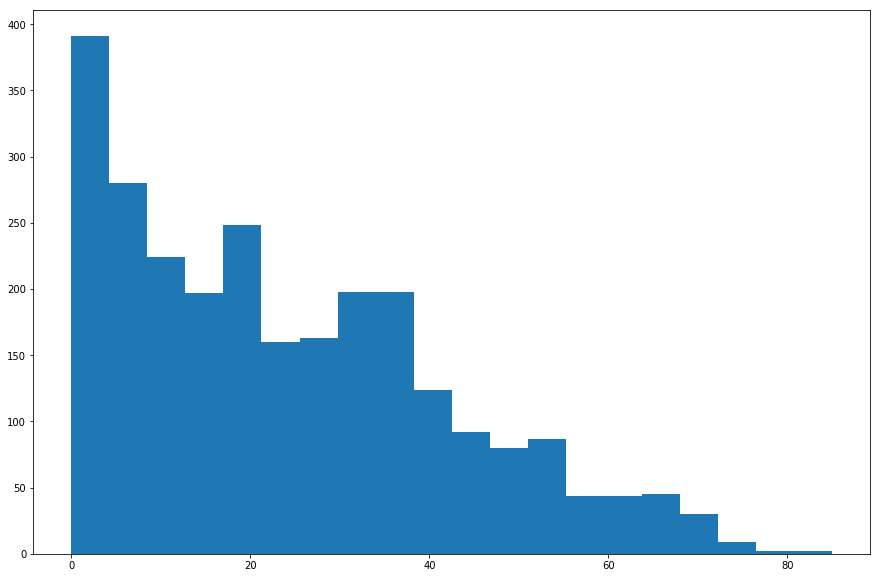

In [157]:
plt.figure(figsize=(15,10))
plt.hist(age_dist,bins=20)
plt.show()

In [186]:
age_hist,b,a=plt.hist(age_dist,bins=20)

In [193]:
pd.unique(measles1911['Ethnicity'])

array(['Rotuman/Rotuman', 'Rot-Euro/Rot-Euro', 'Rotuman/Rot-European',
       'Rotuman/Rot-Pac Is', 'Rotuman/European', 'Rotuman/Pac Is',
       'Rot-Pac Is/Rotuman', 'Rot-Euro/Rotuman', 'Pac Is/Pac Is'], dtype=object)

In [194]:
pd.unique(alive1911['Ethnicity'])

array(['Rotuman/Rotuman', 'Pac Is/Rotuman', 'Rotuman/European',
       'Rotuman/Rot-European', 'Rot-Euro/Rot-Euro', 'Rotuman/Rot-Pac Is',
       'Rot-Pac Is/Rotuman', 'Rot-Euro/Rotuman', 'Rotuman-Pac Is/Pac Is',
       'Rotuman/Pac Is', 'Rot-Asian/Rot-Euro', 'Pac Is/Rotuman-Pac Is',
       'Pac Is/Pac Is', 'European/European', 'Other/Other',
       'No Info/Pac Is', 'Rotuman-Pac Is/Rotuman', 'Rotuman-Euro/European',
       'Pac Is/No Info', 'Part-Euro/European', 'Rotuman/Rot-Euro',
       'Pac Is/European'], dtype=object)

In [24]:
measles1911_age=measles1911['Age at Death'].values
age_dist_meas=measles1911_age
for i in range(len(measles1911)):
    age_dist_meas[i]=float(measles1911_age[i])

In [74]:
measles1911_age

array([4.0, 1.0, 8.0, 0.8, 4.0, 4.0, 0.9, 2.1, 6.0, 1.2, 2.0, 4.0, 0.0,
       0.2, 0.6, 0.6, 2.9, 1.2, 1.2, 3.3, 0.7, 2.5, 2.2, 4.8, 0.7, 0.3,
       1.2, 1.3, 1.4, 1.1, 2.7, 0.9, 1.8, 6.0, 1.2, 1.7, 1.5, 1.4, 4.4,
       0.8, 0.1, 4.0, 2.4, 0.7, 0.9, 1.2, 0.3, 2.8, 11.0, 1.2, 8.0, 3.0,
       8.0, 1.7, 60.0, 42.0, 50.0, 40.0, 31.0, 27.0, 25.0, 28.0, 20.0,
       19.0, 9.0, 9.0, 6.0, 0.0, 17.0, 14.0, 32.0, 40.0, 25.0, 24.0, 20.0,
       39.0, 70.0, 70.0, 0.8, 30.0, 30.0, 36.0, 0.6, 42.0, 11.0, 50.0, 1.7,
       33.0, 26.0, 7.0, 17.0, 6.0, 7.0, 24.0, 25.0, 42.0, 30.0, 26.0, 40.0,
       25.0, 20.0, 35.0, 36.0, 26.0, 8.0, 0.5, 7.0, 26.0, 24.0, 3.0, 55.0,
       39.0, 28.0, 16.0, 25.0, 20.0, 0.4, 0.4, 5.0, 45.0, 45.0, 18.0, 19.0,
       50.0, 15.0, 30.0, 45.0, 14.0, 10.0, 5.0, 35.0, 28.0, 6.0, 2.0, 20.0,
       50.0, 19.0, 20.0, 26.0, 40.0, 4.0, 24.0, 4.0, 16.0, 18.0, 25.0,
       37.0, 21.0, 44.0, 28.0, 21.0, 20.0, 45.0, 50.0, 20.0, 34.0, 45.0,
       18.0, 3.0, 30.0, 18.0, 45.0, 48.0, 

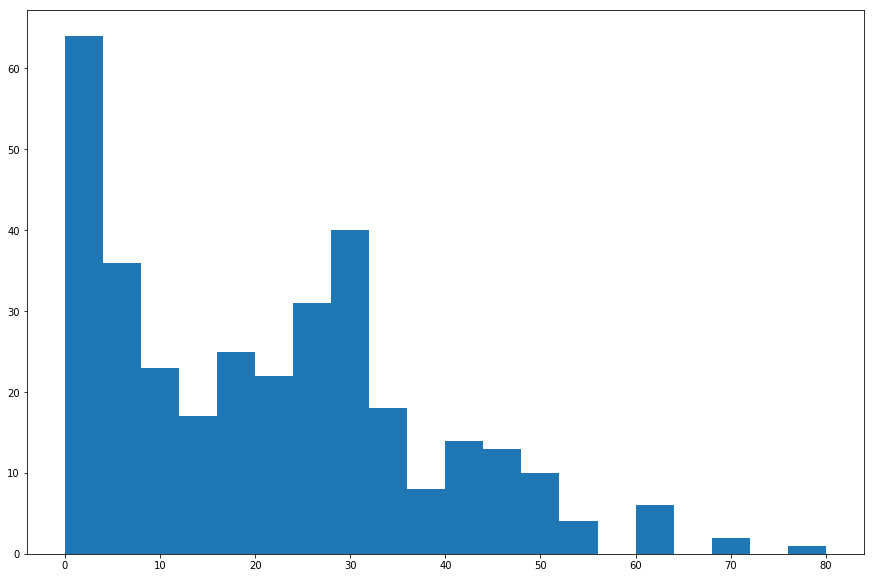

In [25]:
plt.figure(figsize=(15,10))
plt.hist(age_dist_meas,bins=20)
plt.show()

In [187]:
measles_hist,a,b=plt.hist(age_dist_meas,bins=20)

In [192]:
chisquare(measles_hist,f_exp=334*age_hist/sum(age_hist))

Power_divergenceResult(statistic=43.08210475358775, pvalue=0.0012632049076021601)

In [35]:
pd.unique(alive1911['Ethnicity'])

array(['Rotuman/Rotuman', 'Pac Is/Rotuman', 'Rotuman/European',
       'Rotuman/Rot-European', 'Rot-Euro/Rot-Euro', 'Rotuman/Rot-Pac Is',
       'Rot-Pac Is/Rotuman', 'Rot-Euro/Rotuman', 'Rotuman-Pac Is/Pac Is',
       'Rotuman/Pac Is', 'Rot-Asian/Rot-Euro', 'Pac Is/Rotuman-Pac Is',
       'Pac Is/Pac Is', 'European/European', 'Other/Other',
       'No Info/Pac Is', 'Rotuman-Pac Is/Rotuman', 'Rotuman-Euro/European',
       'Pac Is/No Info', 'Part-Euro/European', 'Rotuman/Rot-Euro',
       'Pac Is/European'], dtype=object)

In [73]:
#alive1911[alive1911['Ethnicity']=='Pac Is/Rotuman']

In [42]:
for i in range(len(alive1911)):
    
    if alive1911['Pac Is'].values[i]==1:
        print(i)

1
2
15
33
34
61
62
63
64
65
78
92
93
100
101
108
109
110
125
126
127
141
142
173
174
191
235
237
243
250
272
276
277
278
284
285
292
310
311
316
317
318
328
329
330
331
332
343
451
453
465
540
623
648
652
692
715
721
741
756
782
785
789
792
825
840
845
894
944
947
977
999
1004
1015
1040
1043
1047
1052
1079
1093
1095
1108
1110
1121
1122
1136
1141
1151
1156
1160
1173
1178
1181
1188
1211
1229
1230
1234
1261
1278
1289
1292
1297
1306
1308
1322
1324
1375
1385
1419
1420
1421
1427
1430
1434
1450
1453
1455
1490
1502
1507
1520
1523
1528
1533
1534
1544
1545
1569
1610
1654
1655
1707
1710
1717
1739
1749
1772
1793
1795
1806
1848
1859
2068
2180
2187
2252
2267
2272
2366
2389
2419
2475
2480
2505
2569
2572
2573
2574
2579
2585
2588
2611
2614
2617


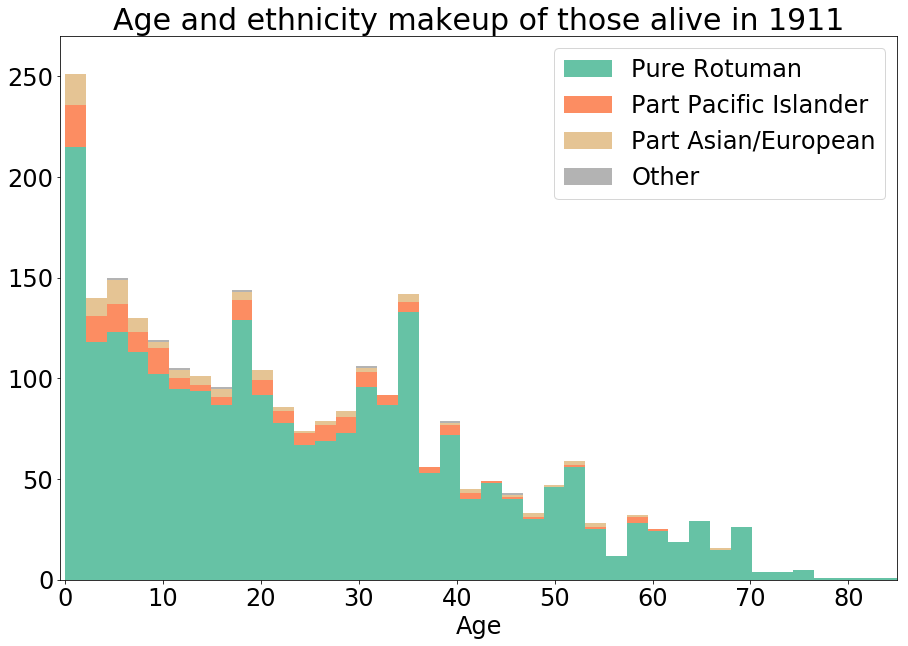

In [127]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 24})
plt.hist([age_dist_rot,age_dist_pacis,age_dist_nonpacis,age_dist_other],color=[set2_colors[0],set2_colors[2],set2_colors[7],set2_colors[9]],bins=40,stacked=True,label=["Pure Rotuman","Part Pacific Islander","Part Asian/European","Other"])

plt.ylim((0,270))
plt.xlim((-0.5,85))
plt.legend()
plt.xlabel("Age")
plt.title("Age and ethnicity makeup of those alive in 1911",fontsize=30)
#"Pacific Islander","Asian/European","Other"])
plt.show()

In [78]:
measles1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
163,Aisake,m,4/15/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2,27,28,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
164,Kijiana,f,4/15/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3,30,31,5/15/1904,Rotuman/Rotuman,NaN,NaN,NaN
306,Marsoana,f,03/15/1903,rupe mere,riamkau,14/04/1911,measles,8,1,16,18,NaN,Rotuman/Rotuman,NaN,NaN,NaN
310,Lavenia Tausia,f,7/15/1910,rupe mere,riamkau,25/04/1911,"measles, diarrhoea",0.8,5,23,26,NaN,Rotuman/Rotuman,NaN,NaN,NaN
776,Mokitau,m,4/15/1907,fanjese matelita,atalifo terotuma,15/04/1911,"measles, diarrhoea",4,3,26,25,NaN,Rotuman/Rotuman,NaN,NaN,NaN
1186,Vilsoni,m,10/15/1906,ana turuaf hoerder,kuru uasele,10/04/1911,measles,4,2,20,21,04/15/1903,Rot-Euro/Rot-Euro,NaN,NaN,NaN
1206,Emose,m,5/15/1910,tausia isapeti,turapu aptinko,21/04/1911,measles,0.9,1,18,21,NaN,Rotuman/Rotuman,NaN,NaN,NaN
1315,Tua,m,4/15/1909,akanisi feskatoa,vataiki,01/05/1911,"measles, diarrhoea",2.1,1,17,21,2/15/1908,Rotuman/Rotuman,NaN,NaN,NaN
1588,Tua,f,7/15/1904,aitu tausia,firipo,06/04/1911,measles,6,1,23,24,NaN,Rotuman/Rot-European,NaN,NaN,NaN
3772,Lustika,f,1/15/1910,faga eleni,arosio ravak,01/04/1911,measles,1.2,2,18,30,2/15/1907,Rotuman/Rotuman,NaN,NaN,NaN


In [83]:
age_meas_rot=np.array([])
age_meas_pacis=np.array([])
age_meas_nonpacis=np.array([])
age_meas_other=np.array([])


for i in range(len(measles1911)):
    
    if measles1911['Pac Is'].values[i]==1:
        #print(i)
        age_meas_pacis=np.append(age_meas_pacis,(measles1911_age[i]))
        #print(age_dist_pacis)
    elif measles1911['Non Pac Is'].values[i]==1:
        age_meas_nonpacis=np.append(age_meas_nonpacis,measles1911_age[i])
    elif measles1911['Rotuman'].values[i]==1 and measles1911['Pac Is'].values[i]==0 and measles1911['Non Pac Is'].values[i]==0:
        age_meas_rot=np.append(age_meas_rot,measles1911_age[i])
    else:
        age_meas_other=np.append(age_meas_other,measles1911_age[i])
    

In [82]:
measles1911

,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
163,Aisake,m,15/04/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2,27,28,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
164,Kijiana,f,15/04/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3,30,31,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
306,Marsoana,f,15/03/1903,rupe mere,riamkau,14/04/1911,measles,8,1,16,18,NaN,Rotuman/Rotuman,1.0,0.0,0.0
310,Lavenia Tausia,f,15/07/1910,rupe mere,riamkau,25/04/1911,"measles, diarrhoea",0.8,5,23,26,NaN,Rotuman/Rotuman,1.0,0.0,0.0
776,Mokitau,m,15/04/1907,fanjese matelita,atalifo terotuma,15/04/1911,"measles, diarrhoea",4,3,26,25,NaN,Rotuman/Rotuman,1.0,0.0,0.0
1186,Vilsoni,m,15/10/1906,ana turuaf hoerder,kuru uasele,10/04/1911,measles,4,2,20,21,04/15/1903,Rot-Euro/Rot-Euro,1.0,0.0,1.0
1206,Emose,m,15/05/1910,tausia isapeti,turapu aptinko,21/04/1911,measles,0.9,1,18,21,NaN,Rotuman/Rotuman,1.0,0.0,0.0
1315,Tua,m,15/04/1909,akanisi feskatoa,vataiki,01/05/1911,"measles, diarrhoea",2.1,1,17,21,2/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
1588,Tua,f,15/07/1904,aitu tausia,firipo,06/04/1911,measles,6,1,23,24,NaN,Rotuman/Rot-European,1.0,0.0,1.0
3772,Lustika,f,15/01/1910,faga eleni,arosio ravak,01/04/1911,measles,1.2,2,18,30,2/15/1907,Rotuman/Rotuman,1.0,0.0,0.0


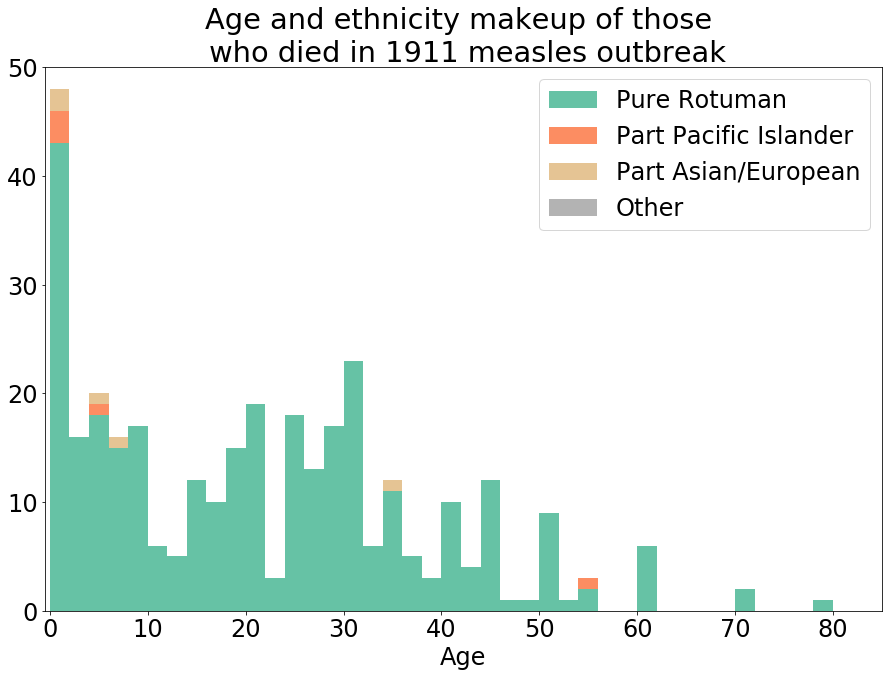

In [126]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 24})
plt.hist([age_meas_rot,age_meas_pacis,age_meas_nonpacis,age_meas_other],color=[set2_colors[0],set2_colors[2],set2_colors[7],set2_colors[9]],bins=40,stacked=True,label=["Pure Rotuman","Part Pacific Islander","Part Asian/European","Other"])

plt.ylim((0,50))
plt.xlim((-0.5,85))
plt.legend()
plt.xlabel("Age")
plt.title("Age and ethnicity makeup of those \n who died in 1911 measles outbreak")
plt.show()

In [289]:
age_dist_rot

array([], dtype=float64)

In [123]:
len(data[data['Cause of Death'].str.contains('diarrhoea')==True])

510

In [118]:
pd.unique(measles1911['Cause of Death'])

array(['measles, diarrhoea', 'measles', 'measles, diahrroea',
       'measles, debility', 'measles, ileo-colitis', 'measles, phthisis',
       'phthisis, measles', 'measles, diarrhoea,\x0bheart failure',
       'measles, tuberculosis', 'measles, convulsions',
       'measles, yaws, \x0bsore throat', 'measles, gastritis',
       'measles, pneumonia', 'measles, diarrhoea,\x0bpregnancy',
       'measles, diarrhoea, phthisis', 'measles, diarrhoea, ostitis',
       'measles, miscarriage', 'measles, phthisis, diarrhoea',
       'measles, diarrhoea,\x0bchildbirth',
       'measles, diarrhoea,\x0bmiscarriage'], dtype=object)

In [272]:
np.arange(86)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [270]:
max(age_dist)

85.0

In [ ]:
totals = [i+j+k+l+m for i,j,k,l,m in zip(agsectorloss, exportloss, welfarecost, tourismcost, directfarmcost)]
greenBars = [i / j * 100 for i,j in zip(agsectorloss, totals)]
orangeBars = [i / j * 100 for i,j in zip(exportloss, totals)]
blueBars = [i / j * 100 for i,j in zip(welfarecost, totals)]
goldBars = [i / j * 100 for i,j in zip(tourismcost, totals)]
redBars = [i / j * 100 for i,j in zip(directfarmcost, totals)]
%%matplotlibmatplotl  notebook

fig = plt.figure(num=1, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
p2 = plt.bar(ind, greenBars, width, alpha = 0.4)
p3 = plt.bar(ind, orangeBars, width, bottom =np.array(greenBars), alpha = 0.4)
p4 = plt.bar(ind, blueBars, width, bottom = [i+j for i,j in zip(orangeBars, greenBars)] , alpha = 0.4)
p5 = plt.bar(ind, goldBars, width,bottom = [i+j+k for i,j,k in zip(orangeBars, greenBars, blueBars)], alpha = 0.4)
p6 = plt.bar(ind, redBars, width,bottom = [i+j+k+l for i,j,k,l in zip(orangeBars, greenBars, blueBars, goldBars)]
             , alpha = 0.4)
# Create orange Bars
plt.ylabel('Cost Breakdown, %', fontsize = 30)

plt.xticks(ind, ('1','2','3','4','5','6'), fontsize = 20)
lgd = plt.legend(( p2[0], p3[0], p4[0], p5[0], p6[0]), 
                 ( 'Agricultural Loss', 'Export Loss', 'Welfare Cost', 'Tourism Loss', 'Direct Farm \nCosts'),
                 ncol = 3,
                 fontsize = 20, bbox_to_anchor=(1.1,-.1), frameon=False)


plt.yticks(fontsize = 20)

plt.tight_layout( pad=20)


ax.text(0.92, 60, r'£ {} M'.format(int(round(np.mean(cost4)/(1e6), 0))), rotation = 90, fontsize=30, color ='grey', alpha = 1, weight = 'bold')
ax.text(1.92, 60, r'£ {} M'.format(int(round(np.mean(cost3)/(1e6), 0))), rotation = 90, fontsize=30,  color ='grey',  alpha = 1, weight = 'bold')
ax.text(2.92, 60, r'£ {} M'.format(int(round(np.mean(cost6)/(1e6),0))), rotation = 90, fontsize=30,  color ='grey',  alpha = 1, weight = 'bold')
ax.text(-0.08, 60, r'£ {} M'.format(int(round(np.mean(cost1)/(1e6),0))), rotation = 90, fontsize=30,  color ='grey',  alpha = 1, weight = 'bold')
ax.text(3.92, 60, r'£ {} M'.format(int(round(np.mean(cost2)/(1e6),0))), rotation = 90, fontsize=30,  color ='grey',  alpha = 1,weight = 'bold')
ax.text(4.92, 60, r'£ {} M'.format(int(round(np.mean(cost5)/(1e6),0))), rotation = 90, fontsize=30,  color ='grey',  alpha = 1,weight = 'bold')